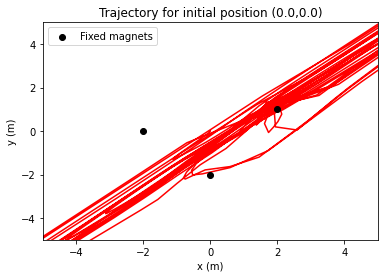

In [16]:
#Plot
import math
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter
from matplotlib import animation


sign = lambda x: math.copysign(1, x)
#Declare constants
DT = .1 #Time step (in seconds)
TMAX = 100 #Total time of simulation (in seconds)
K = 0.50 #Restoring constant (in N/m/kg)
B = 0.15 #Drag constant (in Ns/m/kg)
J = 1.0 #Magnet constant (in N m^2/kg)
Z = .25 #Vertical position of pendulum (in m)

#x and y positions of the fixed magnets as well as their strengths and magnetic charge relitive to pendelum positive attracts.
MX = np.array([2,0,-2]) 
MY = np.array([1,-2,0])
Magnets = np.array([MX, MY])
S= np.array([10,10,10])

#Total number of time steps
N = int(TMAX/DT)

#Declare main arrays
t = np.empty(N)	#Time array
x = np.empty(N) #x position array
y = np.empty(N) #y position array
vx = np.empty(N) #x velocity array
vy = np.empty(N) #y velocity array

#Method to find the x acceleration
def aX(x,y,vx):

  #Contribution from gravity
    xgrav = -K*x

  #Contribution from drag
    xdrag = -B*vx
    
    # The previous 0, 1, 2 (that represent different magnets) are replaced by index here
    #Magnets[0] is the array containing x coordinates of all magnets
    #MX[0] = Magnets[0][index]; MY[0] = Magnets[1][index]; S[0]=S[index]
    total_xmag = 0
    for index in range(len(Magnets[0])): 
        if y - Magnets[1][index] == 0: 
            xmag = sign(Magnets[0][index]-x)*(J*S[index])/((x-Magnets[0][index])**2+(y-Magnets[1][index])**2+(Z)**2)
        else:
            xmag = sign(Magnets[0][index]-x)*(J*S[index]*(abs(np.sin(np.arctan((x-Magnets[0][index])/(y-Magnets[1][index]))))))/((x-Magnets[0][index])**2+(y-Magnets[1][index])**2+(Z)**2)
        total_xmag += xmag
        
    return xgrav + xdrag + total_xmag

#Method to find the y acceleration
def aY(x,y,vy):

  #Contribution from gravity
    ygrav = -K*y

  #Contribution from drag
    ydrag = -B*vy
    
    # The previous 0, 1, 2 (that represent different magnets) are replaced by index here
    #Magnets[0] is the array containing x coordinates of all magnets
    #MX[0] = Magnets[0][index]; MY[0] = Magnets[1][index]; S[0]=S[index]
    total_ymag = 0
    for index in range(len(Magnets[1])): 
        if y - Magnets[1][index] == 0: 
            ymag=0
        else:
            ymag = sign(Magnets[1][index]-y)*(J*S[index]*(abs(np.cos(np.arctan((x-Magnets[0][index])/(y-Magnets[1][index]))))))/((x-Magnets[0][index])**2+(y-Magnets[1][index])**2+(Z)**2)
        total_ymag += ymag
        
    return ygrav + ydrag + total_ymag

#Initial conditions (start with no velocity)
t[0] = 0 #Initial time (in sec)
x[0] = 0 #Initial x position (in m)
y[0] = 0 #Initial y position (in m)
vx[0] = 0 #Initial x velocity (in m/s)
vy[0] = 0 #Initial y velocity (in m/s)

#Do one step of Euler's method to get the next values
t[1] = t[0] + DT

x[1] = x[0] + vx[0] * DT
y[1] = y[0] + vy[0] * DT

vx[1] = vx[0] + aX(x[0],y[0],vx[0]) * DT
vy[1] = vy[0] + aY(x[0],y[0],vy[0]) * DT

fig, ax = plt.subplots()
for i in range(1,N-1):
    t[i+1] = t[i] + DT
	
  #Verlet's method to find positions
    x[i+1] = x[i]+vx[i]*DT+(aX(x[i],y[i],vx[i])*(DT**2)*0.5)
    y[i+1] = x[i]+vy[i]*DT+(aY(x[i],y[i],vy[i])*(DT**2)*0.5)
    #Euler's method to find velocities
    vx[i+1] = vx[i] + aX(x[i],y[i],vx[i])*DT
    vy[i+1] = vy[i] + aY(x[i],y[i],vy[i])*DT

#Plot the trajectory
plt.plot(x,y,zorder=1,color='red')
plt.scatter(MX,MY,color='black',zorder=2,label='Fixed magnets')
plt.scatter(x[i],y[i],color='magenta',zorder=3)
title = 'Trajectory for initial position ('+str(x[0])+','+str(y[0])+')'
plt.title(title)
plt.xlabel('x (m)')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.ylabel('y (m)')
plt.legend()
plt.show()

In [8]:
#Animation
import math
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter
from matplotlib import animation

%matplotlib osx
sign = lambda x: math.copysign(1, x)
#Declare constants
DT = .1 #Time step (in seconds)
TMAX = 100 #Total time of simulation (in seconds)
K = 0.50 #Restoring constant (in N/m/kg)
B = 0.15 #Drag constant (in Ns/m/kg)
J = 1.0 #Magnet constant (in N m^2/kg)
Z = .25 #Vertical position of pendulum (in m)

#x and y positions of the fixed magnets as well as their strengths and magnetic charge relitive to pendelum positive attracts.
MX = np.array([-3,4,6,5]) 
MY = np.array([5,-1,2,-1])
Magnets = np.array([MX, MY])
S= np.array([10,10,10,10])

#Total number of time steps
N = int(TMAX/DT)

#Declare main arrays
t = np.empty(N)	#Time array
x = np.empty(N) #x position array
y = np.empty(N) #y position array
vx = np.empty(N) #x velocity array
vy = np.empty(N) #y velocity array

#Method to find the x acceleration
def aX(x,y,vx):

  #Contribution from gravity
    xgrav = -K*x

  #Contribution from drag
    xdrag = -B*vx
    
    # The previous 0, 1, 2 (that represent different magnets) are replaced by index here
    #Magnets[0] is the array containing x coordinates of all magnets
    #MX[0] = Magnets[0][index]; MY[0] = Magnets[1][index]; S[0]=S[index]
    total_xmag = 0
    for index in range(len(Magnets[0])): 
        if y - Magnets[1][index] == 0: 
            xmag = sign(Magnets[0][index]-x)*(J*S[index])/((x-Magnets[0][index])**2+(y-Magnets[1][index])**2+(Z)**2)
        else:
            xmag = sign(Magnets[0][index]-x)*(J*S[index]*(abs(np.sin(np.arctan((x-Magnets[0][index])/(y-Magnets[1][index]))))))/((x-Magnets[0][index])**2+(y-Magnets[1][index])**2+(Z)**2)
        total_xmag += xmag
        
    return xgrav + xdrag + total_xmag

#Method to find the y acceleration
def aY(x,y,vy):

  #Contribution from gravity
    ygrav = -K*y

  #Contribution from drag
    ydrag = -B*vy
    
    # The previous 0, 1, 2 (that represent different magnets) are replaced by index here
    #Magnets[0] is the array containing x coordinates of all magnets
    #MX[0] = Magnets[0][index]; MY[0] = Magnets[1][index]; S[0]=S[index]
    total_ymag = 0
    for index in range(len(Magnets[1]-1)): 
        if y - Magnets[1][index] == 0: 
            ymag=0
        else:
            ymag = sign(Magnets[1][index]-y)*(J*S[index]*(abs(np.cos(np.arctan((x-Magnets[0][index])/(y-Magnets[1][index]))))))/((x-Magnets[0][index])**2+(y-Magnets[1][index])**2+(Z)**2)
        total_ymag += ymag
        
    return ygrav + ydrag + total_ymag

#Initial conditions (start with no velocity)
t[0] = 0 #Initial time (in sec)
x[0] = 5 #Initial x position (in m)
y[0] = 1 #Initial y position (in m)
vx[0] = 0 #Initial x velocity (in m/s)
vy[0] = 0 #Initial y velocity (in m/s)

#Do one step of Euler's method to get the next values
t[1] = t[0] + DT

x[1] = x[0] + vx[0] * DT
y[1] = y[0] + vy[0] * DT

vx[1] = vx[0] + aX(x[0],y[0],vx[0]) * DT
vy[1] = vy[0] + aY(x[0],y[0],vy[0]) * DT

for i in range(N-1):
        t[i+1] = t[i] + DT

        x[i+1] = x[i]+vx[i]*DT+(aX(x[i],y[i],vx[i])*(DT**2)*0.5)
        y[i+1] = x[i]+vy[i]*DT+(aY(x[i],y[i],vy[i])*(DT**2)*0.5)

        vx[i+1] = vx[i] + aX(x[i],y[i],vx[i])*DT
        vy[i+1] = vy[i] + aY(x[i],y[i],vy[i])*DT

# Initilize writer 
metadata = dict(title='2D animation', artist='Matplotlib')
writer = FFMpegWriter(fps=50, metadata=metadata, bitrate=200000)
fig = plt.figure(dpi=200)

fig, ax = plt.subplots()

## SAVE AS MP4 ##
with writer.saving(fig, "magnet.mp4", dpi=200):
    for i in range(N-1):
        ax.clear()
        
        ax.plot(x,y,zorder=1,color='magenta')
        ax.scatter(MX,MY,color='black',zorder=3,label='Fixed magnets')
        ax.scatter(x[i],y[i],color='magenta',zorder=5)
        
        plt.draw()
        plt.pause(0.00001)
        writer.grab_frame()